In [1]:
import os
import numpy as np
import pydicom # !pip install pydicom


def load_dicom_images_as_numpy(folder_path: str):
    """
    Load DICOM images from a folder, preprocess them, and convert to a numpy array.

    Args:
    folder_path (str): Path to the folder containing DICOM files.

    Returns:
    numpy.ndarray: An array containing all the preprocessed DICOM images.
    """

    images = []
    ids = []

    # Iterate over the DICOM files
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.dcm'):
            id = filename.split('_')[-3]
            ids.append(id)
            filepath = os.path.join(folder_path, filename)
            dicom_data = pydicom.dcmread(filepath)
            image = dicom_data.pixel_array
            image = image[100:320, 100:300] # cropping
            images.append(image)

    # Sorting images with respect to their ids
    sorted_pairs = sorted(zip(ids, images), key=lambda x: x[0])
    sorted_ids, sorted_images = zip(*sorted_pairs)

    # Stack all the images into a single numpy array
    numpy_images = np.stack(sorted_images)

    return numpy_images

def normalize(dicom_array):
    max_val = np.max(dicom_array)
    min_val = np.min(dicom_array)
    return (dicom_array - min_val) / (max_val - min_val)

In [2]:
dicom_directory = 'data/0'
dicom_array = normalize(load_dicom_images_as_numpy(dicom_directory))
dicom_array.shape

(96, 60, 60)

In [3]:
import time
import cripser as cr
import tcripser as tcr
import persim

# compute PH for the T-construction with the python wrapper (takes time)
start = time.time()
pdt = tcr.computePH(dicom_array)


ModuleNotFoundError: No module named 'cripser'

In [59]:
import gudhi

pdt0 = pdt[pdt[:,0] == 0][:, 1:3]
pdt0.shape

(118309, 2)

In [62]:
pdt0[:, 1] = np.where(pdt0[:, 1] > 1.0, 1.0, pdt0[:, 1])

In [63]:
birth = pdt0[:,0]
death = pdt0[:,1]

/home/shlee/miniconda3/envs/nims_workshop/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 118309 intervals given as input, whereas max_intervals is set to 20000.
  warnings.warn(


<Axes: title={'center': 'Persistence barcode'}>

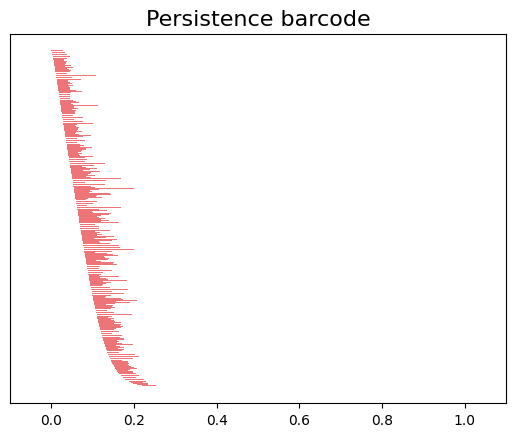

In [66]:
gudhi.plot_persistence_barcode(pdt0)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

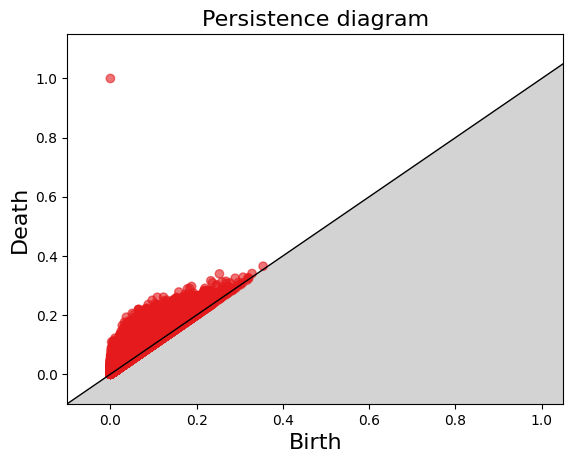

In [67]:
gudhi.plot_persistence_diagram(pdt0)

In [68]:
pdt1 = pdt[pdt[:,0] == 1][:, 1:3]
pdt1.shape

(439542, 2)

/home/shlee/miniconda3/envs/nims_workshop/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 439542 intervals given as input, whereas max_intervals is set to 20000.
  warnings.warn(


<Axes: title={'center': 'Persistence barcode'}>

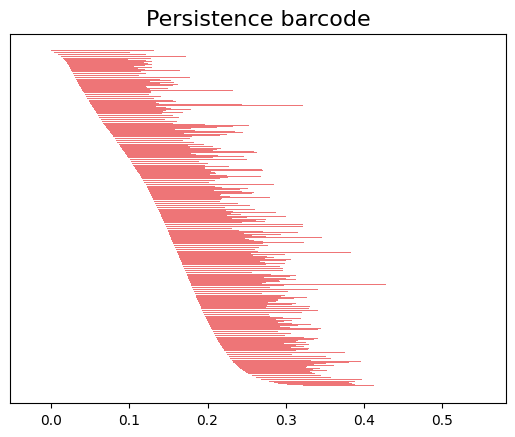

In [70]:
gudhi.plot_persistence_barcode(pdt1)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

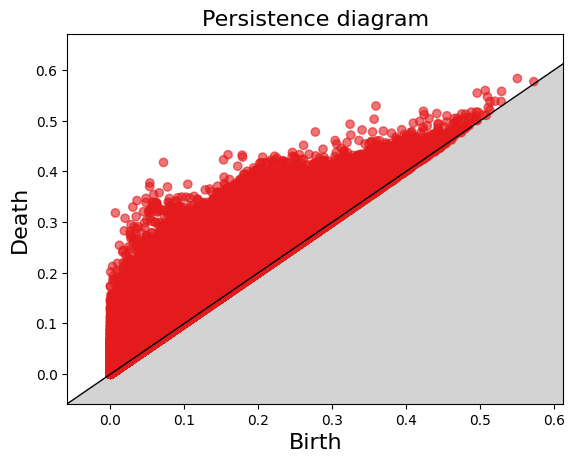

In [71]:
gudhi.plot_persistence_diagram(pdt1)

In [72]:
pdt2 = pdt[pdt[:,0] == 2][:, 1:3]
pdt2.shape

(268457, 2)

/home/shlee/miniconda3/envs/nims_workshop/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 268457 intervals given as input, whereas max_intervals is set to 20000.
  warnings.warn(


<Axes: title={'center': 'Persistence barcode'}>

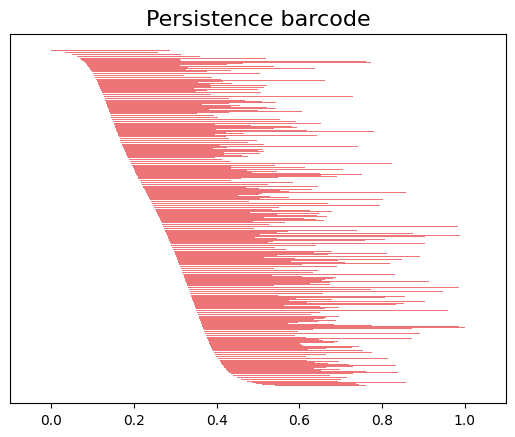

In [73]:
gudhi.plot_persistence_barcode(pdt2)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

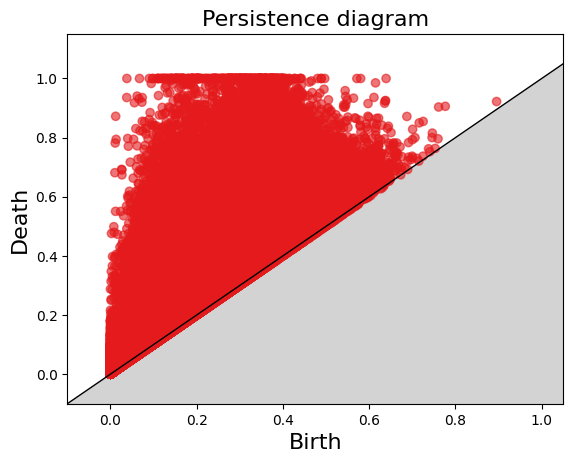

In [74]:
gudhi.plot_persistence_diagram(pdt2)